# Capstone Project - The Battle of Neighborhoods (Week 2)
In this week, you will continue working on your capstone project. Please remember by the end of this week, you will need to submit the following:

#### A full report consisting of all of the following components :

<div class="alert alert-block alert-info" style="margin-top: 20px">

<font size = 3>

1.  <a href="#item1">Introduction</a>

2.  <a href="#item2">Data and the source of the data.</a>

3.  <a href="#item3">Methodology section which represents the main component of the report where you discuss and describe any exploratory data analysis that you did, any inferential statistical testing that you performed, if any, and what machine learnings were used and why.
</a>

4.  <a href="#item4">Results section where you discuss the results.</a>

5.  <a href="#item5">Discussion section where you discuss any observations you noted and any recommendations you can make based on the results.</a>  





##  Introduction 

We explored New York and Toronto as well as clustering in the previous exercise.
In New York, if someone is looking to open a restaurant, where would you recommend that they open it? 

This project will be of interest to those who want to open a restaurant or begin any other business which related to the similar factors like restaurant in New York.

Before we get the data and start exploring it, let's download all the dependencies that we will need.

## Data and the source of the data.

### New York city geographical coordinates dataset

Load and explore the data

From the Wikipage given the List of postal codes of Canada :

wikilikn： https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M

For your convenience, I downloaded the files and placed it on the server, so you can simply run a `wget` command and access the data. So let's go ahead and do that.


In [74]:
#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c anaconda beautiful-soup --yes
#pip install wordcloud
#!conda install -c conda-forge wordcloud==1.4.1 --yes
#!conda install -c anaconda seaborn -y
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab

#!conda install -c conda-forge wget --yes

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.

PackagesNotFoundError: The following packages are not available from current channels:

  - beautiful-soup

Current channels:

  - https://conda.anaconda.org/anaconda/osx-64
  - https://conda.anaconda.org/anaconda/noarch
  - https://repo.anaconda.com/pkgs/main/osx-64
  - https://repo.anaconda.com/pkgs/main/noarch
  - https://repo.anaconda.com/pkgs/r/osx-64
  - https://repo.anaconda.com/pkgs/r/noarch

To search for alternate channels that may provide the conda package you're
looking for, navigate to

    https://anaconda.org

and use the search bar at the top of the page.




In [96]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

import csv # implements classes to read and write tabular data in CSV form

#!conda install -c anaconda beautiful-soup --yes
from bs4 import BeautifulSoup  # package for parsing HTML and XML documents

from PIL import Image # converting images into arrays

%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0
# install wordcloud
#!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker

# notice: installing seaborn might takes a few minutes
#!conda install -c anaconda seaborn -y
import seaborn as sns

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

# import k-means from clustering stage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score



print('Libraries imported.')

Matplotlib version:  3.3.4
Libraries imported.


downloaded the files and placed it on the server,run a wget command and access the data. 

In [97]:
!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
print('Data downloaded!')

Data downloaded!


In [7]:
#load the data.
with open('newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

In [8]:
neighborhoods_data = newyork_data['features']

In [9]:
neighborhoods_data[0]

{'type': 'Feature',
 'id': 'nyu_2451_34572.1',
 'geometry': {'type': 'Point',
  'coordinates': [-73.84720052054902, 40.89470517661]},
 'geometry_name': 'geom',
 'properties': {'name': 'Wakefield',
  'stacked': 1,
  'annoline1': 'Wakefield',
  'annoline2': None,
  'annoline3': None,
  'annoangle': 0.0,
  'borough': 'Bronx',
  'bbox': [-73.84720052054902,
   40.89470517661,
   -73.84720052054902,
   40.89470517661]}}

In [10]:
#Tranform the data into a pandas dataframe
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

In [11]:
neighborhoods

,Borough,Neighborhood,Latitude,Longitude


In [12]:
#Then let's loop through the data and fill the dataframe one row at a time.
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods = neighborhoods.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

In [13]:
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [14]:
print('The dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods['Borough'].unique()),
        neighborhoods.shape[0]
    )
)

The dataframe has 5 boroughs and 306 neighborhoods.


#### Use geopy library to get the latitude and longitude values of New York City.

In [15]:
address = 'New York City, NY'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of New York City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of New York City are 40.7127281, -74.0060152.


In [102]:
#Create a map of New York with neighborhoods superimposed on top
# create map of New York using latitude and longitude values
map_newyork = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_newyork)  
    
map_newyork

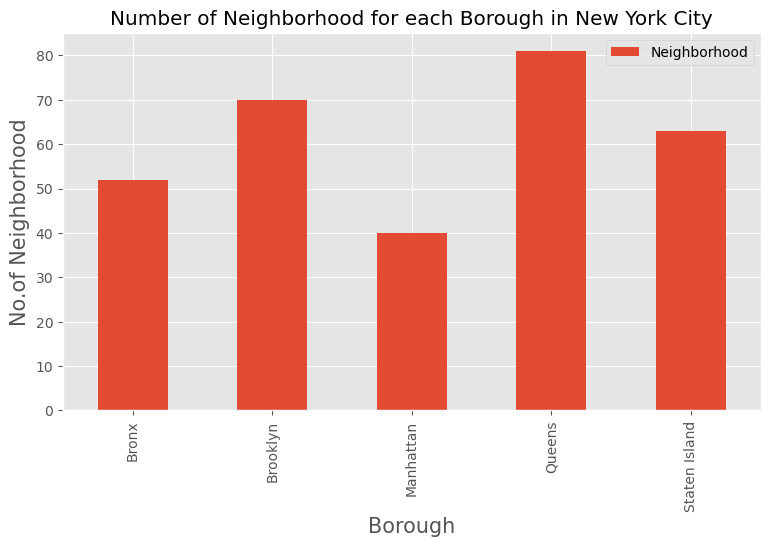

In [103]:
plt.figure(figsize=(9,5), dpi = 100)
# title
plt.title('Number of Neighborhood for each Borough in New York City')
#On x-axis
plt.xlabel('Borough', fontsize = 15)
#On y-axis
plt.ylabel('No.of Neighborhood', fontsize=15)
#giving a bar plot
neighborhoods.groupby('Borough')['Neighborhood'].count().plot(kind='bar')
#legend
plt.legend()
#displays the plot
plt.show()

###  Web scrapping of Population and Demographics data of New York city from Wikipedia

#### POPULATION DATA

Web scrapping of Population data from wikipedia page - https://en.wikipedia.org/wiki/New_York_City



In [274]:
website_url = requests.get('https://en.wikipedia.org/wiki/Demographics_of_New_York_City').text
soup = BeautifulSoup(website_url,'lxml')
table = soup.find('table',{'class':'wikitable sortable'})
#print(soup.prettify())

headers = [header.text for header in table.find_all('th')]

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('gener_info.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

In [275]:
# load data from csv
Pop_data=pd.read_csv('gener_info.csv')
Pop_data.drop(Pop_data.columns[[7,8,9,10,11]], axis=1,inplace=True)
print('Data downloaded!')
Pop_data

Data downloaded!


,New York City's five boroughsvte\n,Jurisdiction\n,Population\n,GDP\n,Land area\n,Density\n,Borough,persons /mi2,persons /km2\n
0,The Bronx\n,\n Bronx\n,"1,418,207\n",42.695\n,42.10\n,109.04\n,"33,867\n",NaN,NaN
1,Brooklyn\n,\n Kings\n,"2,559,903\n",91.559\n,70.82\n,183.42\n,"36,147\n",NaN,NaN
2,Manhattan\n,\n New York\n,"1,628,706\n",600.244\n,22.83\n,59.13\n,"71,341\n",NaN,NaN
3,Queens\n,\n Queens\n,"2,253,858\n",93.310\n,108.53\n,281.09\n,"20,767\n",NaN,NaN
4,Staten Island\n,\n Richmond\n,"476,143\n",14.514\n,58.37\n,151.18\n,"8,157\n",NaN,NaN
5,City of New York,"8,336,817",842.343,302.64,783.83,"27,547","10,636\n",NaN,NaN
6,State of New York,"19,453,561","1,731.910","47,126.40","122,056.82",412,159\n,NaN,NaN
7,Sources:[12][13][14] and see individual boroug...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [276]:
#Remove whitespaces and rename columns
Pop_data.columns = Pop_data.columns.str.replace(' ', '')
Pop_data.columns = Pop_data.columns.str.replace('\'','')
Pop_data.rename(columns={'Borough':'person_mi2','Density\n':'sq_km','Landarea\n':'sq_mi'}, inplace=True)
Pop_data

,NewYorkCitysfiveboroughsvte\n,Jurisdiction\n,Population\n,GDP\n,sq_mi,sq_km,person_mi2,persons/mi2,persons/km2\n
0,The Bronx\n,\n Bronx\n,"1,418,207\n",42.695\n,42.10\n,109.04\n,"33,867\n",NaN,NaN
1,Brooklyn\n,\n Kings\n,"2,559,903\n",91.559\n,70.82\n,183.42\n,"36,147\n",NaN,NaN
2,Manhattan\n,\n New York\n,"1,628,706\n",600.244\n,22.83\n,59.13\n,"71,341\n",NaN,NaN
3,Queens\n,\n Queens\n,"2,253,858\n",93.310\n,108.53\n,281.09\n,"20,767\n",NaN,NaN
4,Staten Island\n,\n Richmond\n,"476,143\n",14.514\n,58.37\n,151.18\n,"8,157\n",NaN,NaN
5,City of New York,"8,336,817",842.343,302.64,783.83,"27,547","10,636\n",NaN,NaN
6,State of New York,"19,453,561","1,731.910","47,126.40","122,056.82",412,159\n,NaN,NaN
7,Sources:[12][13][14] and see individual boroug...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
Pop_data.rename(columns = {'NewYorkCitysfiveboroughsvte\n' : 'Borough',
                           'Jurisdiction\n':'County',
                           'Population\n':'population_2019', 
                           'sq_mi':'square_miles',
                           'sq_km':'square_km',
                           'GDP\n':'GDP_2012',
                           'persons/mi2':'persons_mi2',
                           'persons/km2\n':'persons_km2'
                          }, inplace=True)
Pop_data=Pop_data.drop(columns=['persons_mi2','persons_km2'])
#Pop_data.drop(labels=,axis=1,inplace=True)
Pop_data

,Borough,County,population_2019,GDP_2012,square_miles,square_km,person_mi2
0,The Bronx\n,\n Bronx\n,"1,418,207\n",42.695\n,42.10\n,109.04\n,"33,867\n"
1,Brooklyn\n,\n Kings\n,"2,559,903\n",91.559\n,70.82\n,183.42\n,"36,147\n"
2,Manhattan\n,\n New York\n,"1,628,706\n",600.244\n,22.83\n,59.13\n,"71,341\n"
3,Queens\n,\n Queens\n,"2,253,858\n",93.310\n,108.53\n,281.09\n,"20,767\n"
4,Staten Island\n,\n Richmond\n,"476,143\n",14.514\n,58.37\n,151.18\n,"8,157\n"
5,City of New York,"8,336,817",842.343,302.64,783.83,"27,547","10,636\n"
6,State of New York,"19,453,561","1,731.910","47,126.40","122,056.82",412,159\n
7,Sources:[12][13][14] and see individual boroug...,NaN,NaN,NaN,NaN,NaN,NaN


In [278]:
colname=Pop_data.columns.values.tolist()
print(colname)


['Borough', 'County', 'population_2019', 'GDP_2012', 'square_miles', 'square_km', 'person_mi2']


In [279]:
for i in colname:
    Pop_data[i]=Pop_data[i].replace(to_replace='\n', value='', regex=True)

Pop_data

,Borough,County,population_2019,GDP_2012,square_miles,square_km,person_mi2
0,The Bronx,Bronx,"1,418,207",42.695,42.10,109.04,"33,867"
1,Brooklyn,Kings,"2,559,903",91.559,70.82,183.42,"36,147"
2,Manhattan,New York,"1,628,706",600.244,22.83,59.13,"71,341"
3,Queens,Queens,"2,253,858",93.310,108.53,281.09,"20,767"
4,Staten Island,Richmond,"476,143",14.514,58.37,151.18,"8,157"
5,City of New York,"8,336,817",842.343,302.64,783.83,"27,547","10,636"
6,State of New York,"19,453,561","1,731.910","47,126.40","122,056.82",412,159
7,Sources:[12][13][14] and see individual boroug...,NaN,NaN,NaN,NaN,NaN,NaN


In [280]:
#Pop_data.loc[5:,].shift(periods=1, axis="columns")
Pop_data.loc[5:,:] = Pop_data.loc[2:,:].shift(1,axis=1)
Pop_data
#Pop_data

,Borough,County,population_2019,GDP_2012,square_miles,square_km,person_mi2
0,The Bronx,Bronx,"1,418,207",42.695,42.10,109.04,"33,867"
1,Brooklyn,Kings,"2,559,903",91.559,70.82,183.42,"36,147"
2,Manhattan,New York,"1,628,706",600.244,22.83,59.13,"71,341"
3,Queens,Queens,"2,253,858",93.310,108.53,281.09,"20,767"
4,Staten Island,Richmond,"476,143",14.514,58.37,151.18,"8,157"
5,NaN,City of New York,"8,336,817",842.343,302.64,783.83,"27,547"
6,NaN,State of New York,"19,453,561","1,731.910","47,126.40","122,056.82",412
7,NaN,Sources:[12][13][14] and see individual boroug...,NaN,NaN,NaN,NaN,NaN


In [281]:
# drop nan and lasz row ,because there is nothing useful 
Pop_data = Pop_data.dropna()
#Pop_data=Pop_data.drop(index =7,axis=0)
Pop_data

,Borough,County,population_2019,GDP_2012,square_miles,square_km,person_mi2
0,The Bronx,Bronx,"1,418,207",42.695,42.10,109.04,"33,867"
1,Brooklyn,Kings,"2,559,903",91.559,70.82,183.42,"36,147"
2,Manhattan,New York,"1,628,706",600.244,22.83,59.13,"71,341"
3,Queens,Queens,"2,253,858",93.310,108.53,281.09,"20,767"
4,Staten Island,Richmond,"476,143",14.514,58.37,151.18,"8,157"


####  DEMOGRAPHICS DATA

We will web scrap Demographics data from wikipedia page - https://en.wikipedia.org/wiki/Demographic_history_of_New_York_City

In [302]:
website_url2 = requests.get('https://en.wikipedia.org/wiki/Demographic_history_of_New_York_City').text
soup2 = BeautifulSoup(website_url2,"html.parser")
tables=soup.find_all('tbody')
#tables
#soup2
table = soup.find('table',{'class':'wikitable sortable collapsible'})
#print(soup.prettify())

headers = [header.text for header in table.find_all('th')]

table_rows = table.find_all('tr')        
rows = []
for row in table_rows:
   td = row.find_all('td')
   row = [row.text for row in td]
   rows.append(row)

with open('NYC_DEMO.csv', 'w') as f:
   writer = csv.writer(f)
   writer.writerow(headers)
   writer.writerows(row for row in rows if row)

In [311]:
Demo_data=pd.read_csv('NYC_DEMO.csv')
Demo_data=Demo_data[['Year','Population']]
#Demo_data

#####  New York City ,Bronx,Brooklyn,Manhattan,Queens,Staten Island

In [387]:
#Bronx
table_1=Demo_data[0:11]
table_1.rename(columns={'Population':'NeY_population'}, inplace=True)
#print(table_1)
#
table_2=Demo_data[12:23]
table_2.rename(columns={'Population':'Bronx_population'}, inplace=True)

table_3=Demo_data[24:35]
table_3.rename(columns={'Population':'Brooklyn_population'}, inplace=True)
#
table_4=Demo_data[36:47]
table_4.rename(columns={'Population':'Manhattan_population'}, inplace=True)
#
table_5=Demo_data[48:59]
table_5.rename(columns={'Population':'Queens_population'}, inplace=True)
#
table_6=Demo_data[60:71]
table_6.rename(columns={'Population':'stateni_population'}, inplace=True)
#table_1
popu_data=table_1.merge(table_2,on='Year',how='left')
popu_data=popu_data.merge(table_3,on='Year',how='left')
popu_data=popu_data.merge(table_4,on='Year',how='left')
popu_data=popu_data.merge(table_5,on='Year',how='left')                     
popu_data=popu_data.merge(table_6,on='Year',how='left')
popu_data = popu_data.stack().str.replace(',', '').unstack()
popu_data

/Users/wangyiwen/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4441: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


,Year,NeY_population,Bronx_population,Brooklyn_population,Manhattan_population,Queens_population,stateni_population
0,1900,3437202,200507,1166582,1850093,152999,67021
1,1910,4766883,430980,1634351,2331542,284041,85969
2,1920,5620048,732016,2018356,2284103,469042,116531
3,1930,6930446,1265258,2560401,1867312,1079129,158346
4,1940,7454995,1394711,2698285,1889924,1297634,174441
5,1950,7891957,1451277,2738175,1960101,1550849,191555
6,1960,7781984,1424815,2627319,1698281,1809578,221991
7,1970,7894862,1471701,2602012,1539233,1986473,295443
8,1980,7071639,1168972,2230936,1428285,1891325,352121
9,1990,7322564,1203789,2300664,1487536,1951598,378977


In [388]:
popu_data['Year']=pd.to_numeric(popu_data['Year'])
popu_data['NeY_population']= pd.to_numeric(popu_data['NeY_population'])
popu_data['Bronx_population']= pd.to_numeric(popu_data['Bronx_population'])
popu_data['Brooklyn_population']= pd.to_numeric(popu_data['Brooklyn_population'])
popu_data['Manhattan_population']= pd.to_numeric(popu_data['Manhattan_population'])
popu_data['Queens_population']= pd.to_numeric(popu_data['Queens_population'])
popu_data['stateni_population']= pd.to_numeric(popu_data['stateni_population'])

#popu_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11 entries, 0 to 10
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   Year                  11 non-null     int64
 1   NeY_population        11 non-null     int64
 2   Bronx_population      11 non-null     int64
 3   Brooklyn_population   11 non-null     int64
 4   Manhattan_population  11 non-null     int64
 5   Queens_population     11 non-null     int64
 6   stateni_population    11 non-null     int64
dtypes: int64(7)
memory usage: 704.0 bytes


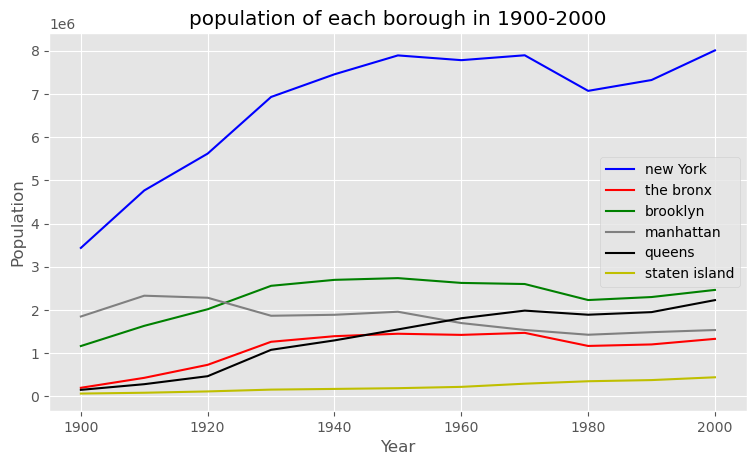

In [389]:
### plot population of each borough
plt.figure(figsize=(9,5), dpi = 100)
plt.title('population of each borough in 1900-2000')

plt.plot(popu_data['Year'], popu_data['NeY_population'], color="blue",label='new York')
plt.plot(popu_data['Year'], popu_data['Bronx_population'], color="red",label='the bronx')
plt.plot(popu_data['Year'], popu_data['Brooklyn_population'], color="green",label='brooklyn')
plt.plot(popu_data['Year'], popu_data['Manhattan_population'], color="grey",label='manhattan')
plt.plot(popu_data['Year'], popu_data['Queens_population'], color="black", label='queens')
plt.plot(popu_data['Year'], popu_data['stateni_population'], color="y",label='staten island' )

plt.xlabel('Year')
plt.ylabel('Population')

plt.legend()
plt.show()

#### Summary
1. Brooklyn has the largest population in 2019

2. Queens had the highest GDP in 2012 and most neighbours .

3. Manhattan has the highest population density

4. Between 1900 and 2000, Queens has the highest population growth rate, and Berkeley has the largest population most of the time.

Conclusion: Based on the above summary, Queens has better investment potential. 

###  Farmers Market dataset

Website-https://www.grownyc.org/greenmarketco/foodbox

In [502]:
# Data from website - https://data.cityofnewyork.us/dataset/DOHMH-Farmers-Markets-and-Food-Boxes/8vwk-6iz2
import os
os.getcwd()
os.listdir(os.getcwd())

['gener_info.csv',
 '.Rhistory',
 'BON2_DEMOGRAPHICS.ipynb',
 'NYC_DEMO.csv',
 'Untitled.ipynb',
 'BON3_NYC_FARMERSMARKET.ipynb',
 'BON3_NYC_CUISINE.ipynb',
 'The Battle of Neighborhoods_Presentation.pdf',
 'weerk 2.ipynb',
 'NYC_CUISINE.csv',
 'README.md',
 'BON5_NYC_CLUSTERING.ipynb',
 'The Battle of Neighborhoods - Week 1 - Part-1.ipynb',
 'The Battle of Neighborhoods_Report.pdf',
 'BON2_POPULATION1.csv',
 'Farmers_market_and_food_boxes_-_New_Data_Dictionary_3_27_18.xlsx',
 'newyork_data.json',
 'Cuisine_of_New_York.csv',
 'DOHMH_Farmers_Markets.csv',
 '.ipynb_checkpoints',
 'The Battle of Neighborhoods - Week 1 - Part-2.ipynb',
 'BON1_NYC_GEO.ipynb']

In [505]:
FM_NYC= pd.read_csv("DOHMH_Farmers_Markets.csv")


In [506]:
FM_NYC.head()

,Borough,Market Name,Street Address,Community District,Latitude,Longitude,Days of Operation,Hours of Operations,Season Dates,Accepts EBT,Open Year-Round,Stellar Cooking Demonstrations,Food Activities for Kids,Location Point
0,Brooklyn,Teens for Food Justice Fresh Food Box & Farmst...,85 Watkins Street,306,40.670986,-73.908194,Tuesday,4-6pm,Year-round,No,Yes,No,No,"(40.670986, -73.908194)"
1,Manhattan,Morningside Park's Down to Earth Farmers' Market,W 110th St & Manhattan Ave,107,40.801155,-73.959647,Saturday,9am-4pm (winter closes at 3pm),Year-Round,Yes,Yes,No,No,"(40.801155, -73.959647)"
2,Bronx,170 Farm Stand,E 170th St & Townsend Ave,204,40.839882,-73.916783,Wednesday,2:30pm-6:30pm,8/12/20-11/25/20,Yes,No,No,No,"(40.839882, -73.916783)"
3,Manhattan,Fulton Stall Market,Pier 17 Square,101,40.705799,-74.002572,Sunday,11am-5pm,04/26/2020-11/22/2020,Yes,No,No,No,"(40.705799, -74.002572)"
4,Queens,Corona Greenmarket,Roosevelt Ave & 103rd St,404,40.749811,-73.861668,Friday,8am - 3pm,6/19 to 11/27,Yes,No,No,No,"(40.749811, -73.861668)"


In [515]:
#neighborhoods
neighborhoods.head()

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585


In [516]:
neighborhoods['Borough'].value_counts().to_frame()

,Borough
Queens,81
Brooklyn,70
Staten Island,63
Bronx,52
Manhattan,40
